# Gauss-Hermite nodes VS Linearly-spaced points

This notebook simply shows the difference we obtain between [`numpy.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) and [`numpy.polynomial.hermite.hermgauss`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.hermite.hermgauss.html).

In [1]:
import numpy as np
from matplotlib import pyplot as plt

What we do is the following.
First, we obtain the Gauss-Hermite (GH) nodes.
This gives us a lower and an upper bound against which we compare linearly spaced grid.
Then we create the `np.linspace` grid with the same lower bound, upper bound and number of points.
Finally, we plot both sets of points and compare them.

In [2]:
n = 15

X1 = np.polynomial.hermite.hermgauss(n)[0]  # see docs!
xLo = np.min(X1)
xHi = np.max(X1)
X0 = np.linspace(xLo, xHi, num=n)

Here it is, we created the grids.
Now we plot them to have a visual representation of what we have.

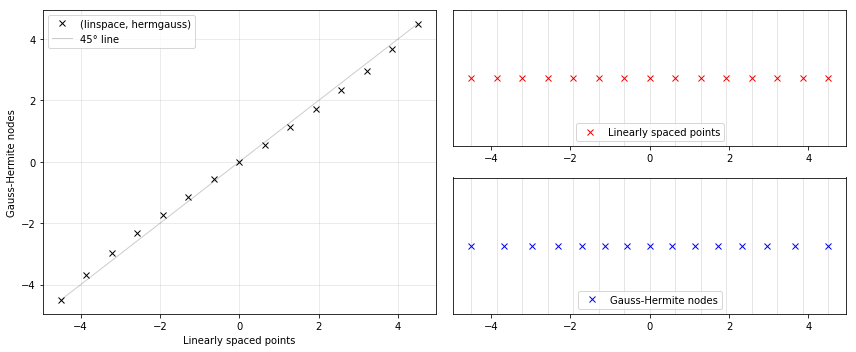

In [3]:
Y = np.zeros((n,))  # simply to put points on a horizontal line

fig = plt.subplots(figsize=(12, 5))

ax = [None, None, None]
pltgrid = (2, 2)

ax[0] = plt.subplot2grid(pltgrid, (0, 0), rowspan=2)
ax[1] = plt.subplot2grid(pltgrid, (0, 1))
ax[2] = plt.subplot2grid(pltgrid, (1, 1), sharex=ax[1])

# linspace against hermgauss
ax[0].plot( X0, X1, 
            color='black',
            linestyle='none',
            marker='x',
            label='(linspace, hermgauss)' )

# the 45-degree line
ax[0].plot( X0, X0,
            color='black',
            alpha=0.2,
            linestyle='solid',
            linewidth=1,
            label='45° line' )

# linspace, horizontally laid-out
ax[1].plot( X0, Y,
            color='red',
            linestyle='none',
            marker='x',
            label='Linearly spaced points' )

# hermgauss, horizontally laid-out
ax[2].plot( X1, Y,
            color='blue',
            linestyle='none',
            marker='x',
            label='Gauss-Hermite nodes' )

# guidelines to compare horizontally laid-out points
guidesStyle = {'color':     'black',
               'alpha':     0.1, 
               'linewidth': 1,
               'linestyle': 'solid'}
[[a.axvline(x, **guidesStyle) for x in X0] for a in ax[1:]]

# hiding y-axis ticks and ticklabels from plots on the right
[a.yaxis.set_ticks([]) for a in ax[1:]]

# showing legends everywhere
[a.legend() for a in ax]

# showing background guidelines in first plot
ax[0].grid(alpha=0.3)

# adding axes labels in first plot
ax[0].set_xlabel('Linearly spaced points')
ax[0].set_ylabel('Gauss-Hermite nodes')

# packing well plots, graphically speaking
plt.tight_layout()

As we can see, GH nodes are not linearly spaced.
They are slightly shifted towards the center of the grid relative to linearly spaced points.
Morover, the further away we are from the center, the more far apart GH nodes are from each other.

These features allow for improvements in matching normal distributions on discrete grids.
Our main application here is the difference between [Tauchen (1986)](https://www.sciencedirect.com/science/article/pii/0165176586901680) and [Tauchen and Hussey (1991)](https://doi.org/10.2307/2938261), who obtain discrete Markov chain processes from continuous AR(1) DGPs.